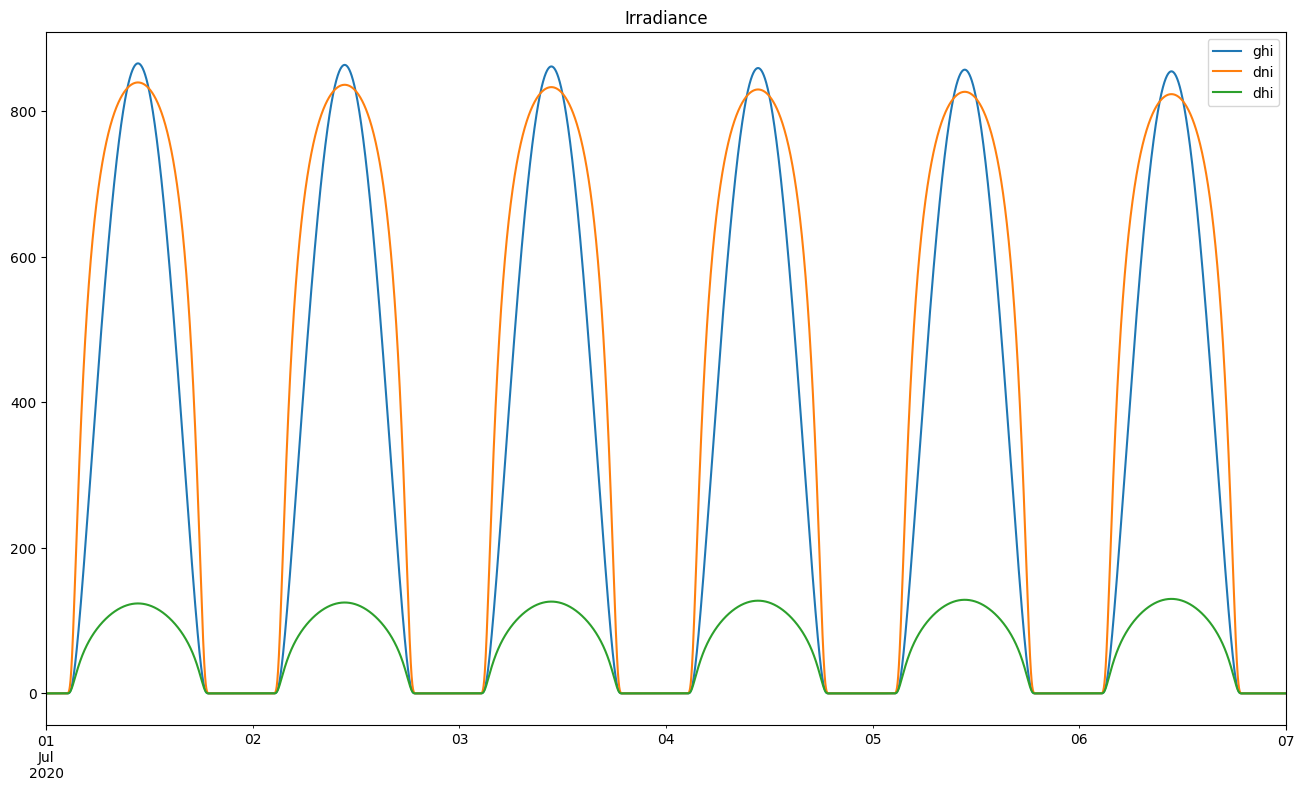

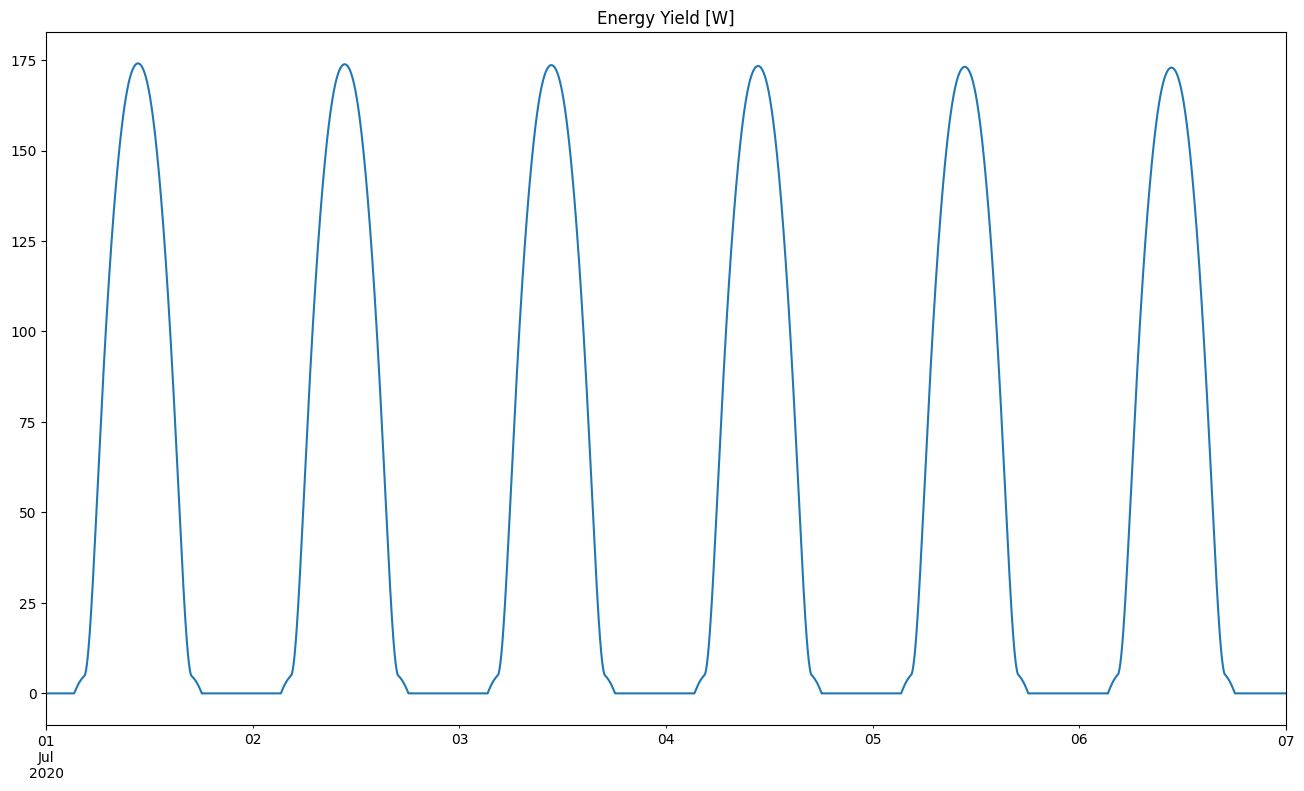

In [ ]:
import pvlib
from pvlib.modelchain import ModelChain
from pvlib.location import Location
from pvlib.pvsystem import PVSystem
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

import matplotlib.pyplot as plt
import pandas as pd

latitude = 50.941389
longitude = 6.958711

location = Location(latitude=latitude, longitude=latitude,
                    tz='Europe/Berlin', altitude=80, name='Cologne Cathedral')

sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
cec_inverters = pvlib.pvsystem.retrieve_sam('CECInverter')

module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = cec_inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_']

temperature_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

system = PVSystem(surface_tilt=45, surface_azimuth=180,
                  module_parameters=module, inverter_parameters=inverter,
                  temperature_model_parameters=temperature_parameters)

modelchain = ModelChain(system, location)

times = pd.date_range(start="2020-07-01", end="2020-07-07",
                     freq="1min", tz=location.tz)

# Gera o grafico de irradiancia, ghi (linha azul) é irradiancia global horizontal,
# dni (linha laranja) é a irradiancia direta normal e dhi (linha verde) é irradiancia difusa horizontal
clear_sky = location.get_clearsky(times)
#print(clear_sky)

clear_sky.plot(figsize=(16,9))
plt.title('Irradiance')
plt.show()

modelchain.run_model(clear_sky)
modelchain.results.ac.plot(figsize=(16,9))
plt.title('Energy Yield [W]')
plt.show()

# Nova seção